## 1. Packages

https://learn.gencore.bio.nyu.edu/rna-seq-analysis/gene-set-enrichment-analysis/

In [1]:
library(ggplot2)
library(clusterProfiler)
library(enrichplot)



clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




## 2.1 data

## 2. Load data

In [14]:
dags_0<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/090gsea/DAG_cell_types/0.csv', sep=",", header=TRUE)

In [15]:
head(dags_0)

,X,Log2FC,Adjusted_pval,Contrast
,<chr>,<dbl>,<dbl>,<int>
1,NPIPB6,2.427118,8.725255e-01,0
2,EIF3CL,2.427118,8.725255e-01,0
3,KRTAP9-7,1.747022,0.000000e+00,0
4,TNXB,1.374449,4.681686e-19,0
5,GKN1,1.325519,1.082568e-30,0
6,GKN2,1.325519,1.082568e-30,0


In [16]:
dim(dags_0)

[1] 17254     4

In [17]:
dags_0 <- dags_0[dags_0$Adjusted_pval < 0.05, ]

In [18]:
dim(dags_0)

[1] 16821     4

In [19]:
dags_0<-dags_0[order(dags_0$Log2FC, decreasing = TRUE),]  

In [20]:
dags_0['cluster']=0

In [21]:
top100<-head(dags_0, n=100)

In [22]:
tail100<-tail(dags_0, n=100)

In [23]:
cluster0<-rbind(top100, tail100)

In [24]:
dim(cluster0)

[1] 200   5

In [25]:
head(cluster0)

,X,Log2FC,Adjusted_pval,Contrast,cluster
,<chr>,<dbl>,<dbl>,<int>,<dbl>
3,KRTAP9-7,1.747022,0.000000e+00,0,0
4,TNXB,1.374449,4.681686e-19,0,0
5,GKN1,1.325519,1.082568e-30,0,0
6,GKN2,1.325519,1.082568e-30,0,0
7,B4GALNT2,1.169679,9.550437e-211,0,0
8,GSDMB,1.131049,7.243309e-223,0,0


In [26]:
for i in (0:8){
    df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/090gsea/DAG_cell_types/{i}.csv', sep=",", header=TRUE)
    df <- df[df$Adjusted_pval < 0.05, ]
    df<-df[order(df$Log2FC, decreasing = TRUE),]  
    df['cluster']={i}
    top100<-head(df, n=100)
    tail100<-tail(df, n=100)
    cluster{i}<-rbind(top100, tail100)
}

all<-rbind(cluster{i} for i in (0:8))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: for i
        ^


In [ ]:
# Initialize a list to store DataFrames for each cluster
all_clusters <- list()

# Loop over cluster indices
for (i in 0:8) {
  # Construct the file path
  file_path <- sprintf('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/090gsea/DAG_cell_types/%d.csv', i)
  
  # Read the CSV file
  df <- read.csv(file_path)
  
  # Filter rows where Adjusted_pval < 0.05
  df <- df[df$Adjusted_pval < 0.05,]
  
  # Sort by Log2FC in descending order
  df<-df[order(df$Log2FC, decreasing = TRUE),] 
  
  # Add a cluster column
  df$cluster <- i
  
  # Select the top and bottom 100 rows
  top100 <- head(df, 100)
  tail100 <- tail(df, 100)
  
  # Combine top and bottom 100 rows
  combined <- rbind(top100, tail100)
  
  # Append to the list of all clusters
  all_clusters[[length(all_clusters) + 1]] <- combined
}

# Concatenate all clusters into a single DataFrame
all_clusters_df <- do.call(rbind, all_clusters)

# Debug: Print the resulting DataFrame
print(head(all_clusters_df))




         X   Log2FC Adjusted_pval Contrast cluster
3 KRTAP9-7 1.747022  0.000000e+00        0       0
4     TNXB 1.374449  4.681686e-19        0       0
5     GKN1 1.325519  1.082568e-30        0       0
6     GKN2 1.325519  1.082568e-30        0       0
7 B4GALNT2 1.169679 9.550437e-211        0       0
8    GSDMB 1.131049 7.243309e-223        0       0


In [ ]:
dim(all_clusters_df)

[1] 1800    5

In [ ]:
# Save the combined DataFrame to a CSV file if needed
write.csv(all_clusters_df, '/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/200variable_genes_each_clusters.csv', row.names = FALSE)

In [ ]:
# we want the log2 fold change 
original_gene_list <- dags_0$Log2FC

# name the vector
names(original_gene_list) <- dags_0$X

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

In [6]:
gene_list

NPIPB6          EIF3CL        KRTAP9-7            TNXB            GKN1 
   2.427118e+00    2.427118e+00    1.747022e+00    1.374449e+00    1.325519e+00 
           GKN2        B4GALNT2           GSDMB           CABP5           KLK13 
   1.325519e+00    1.169679e+00    1.131049e+00    1.122701e+00    1.080591e+00 
          IGFL4       SPATA31C1          GGTLC2        C16orf74          HAPLN3 
   1.033654e+00    1.028436e+00    9.557964e-01    9.521057e-01    9.239800e-01 
          OVOL3           GPR42           PRAME           FOXB1           KRT38 
   9.176388e-01    9.147556e-01    8.834638e-01    8.763667e-01    8.540039e-01 
           CD1B           NANOG         CYP2A13           BTNL3           BTNL9 
   8.400862e-01    8.243028e-01    8.187098e-01    8.098820e-01    8.098820e-01 
           LTBR          SCNN1A            WNT3         CYP4F22          GAPDHS 
   8.098641e-01    8.098641e-01    7.752871e-01    7.611873e-01    7.462561e-01 
        CEACAM6         PCDHGA3         PCDHGB1         PCDHGA4           DPPA3 
   7.439874e-01    7.308257e-01    7.286753e-01    7.270207e-01    7.053841e-01 
       CATSPER4          HEATR9           FOXL1          TXNRD2          REC114 
   7.047403e-01    6.963576e-01    6.790130e-01    6.780536e-01    6.741752e-01 
         RBFOX1             LAT             EPX           PDE6G         HSD17B2 
   6.676456e-01    6.562342e-01    6.461336e-01    6.400251e-01    6.318957e-01 
           PAEP            ZFR2           KRT16        CEACAM20            CCL5 
   6.315077e-01    6.283975e-01    6.126145e-01    6.120199e-01    6.059746e-01 
           CSH1          CYP2B6           KRT32         DEFB128           TTC34 
   6.019184e-01    6.008675e-01    5.984199e-01    5.962902e-01    5.937956e-01 
        ANKRD26           OR2V2           PRTN3          ZNF578         SEC14L3 
   5.884541e-01    5.773823e-01    5.715868e-01    5.699846e-01    5.680556e-01 
        SLC13A5           MEF2B           XAGE3           XAGE5          PRSS50 
   5.676938e-01    5.623912e-01    5.530028e-01    5.530028e-01    5.493640e-01 
         CRYBG2          GUCA2B          A4GALT          CYP1A1           KRT35 
   5.472758e-01    5.469288e-01    5.402327e-01    5.399116e-01    5.381515e-01 
          TDRD9            RD3L            DPRX         CEACAM3            CD1E 
   5.378818e-01    5.377760e-01    5.342960e-01    5.324955e-01    5.265206e-01 
          FCRL2           LARP4         WFDC10A           WFDC8           WFDC9 
   5.243038e-01    5.233021e-01    5.225453e-01    5.225453e-01    5.225453e-01 
           FGF4           KRT14           NUPR1           TSBP1           FCRL5 
   5.192607e-01    5.172284e-01    5.160921e-01    5.159740e-01    5.123647e-01 
        LGALS14          LRRC71         LGALS16          IGSF23            KLK4 
   5.111309e-01    5.109207e-01    5.108919e-01    5.080192e-01    5.064345e-01 
          VSTM1         ZNF280A        DEFB131B          TRIM40            EML2 
   5.037310e-01    5.000135e-01    4.995701e-01    4.995064e-01    4.955177e-01 
           RDM1            TAC4           IGFL1           SEMG2          GSG1L2 
   4.939403e-01    4.916655e-01    4.915253e-01    4.907765e-01    4.906596e-01 
          SNED1             LTF           PERM1          CROCC2          COX6B2 
   4.881458e-01    4.879973e-01    4.871047e-01    4.859594e-01    4.858405e-01 
         LILRB3           HOXB8         CEACAM5           KRT15         SLFN12L 
   4.836845e-01    4.811776e-01    4.798345e-01    4.782456e-01    4.775775e-01 
        CEACAM1           SMIM9           UHRF1         CEACAM4             CLC 
   4.775749e-01    4.770632e-01    4.762081e-01    4.754694e-01    4.748632e-01 
           EPN3          NPIPB7         PGLYRP4            EMP2           IGLL5 
   4.714383e-01    4.708400e-01    4.697473e-01    4.696485e-01    4.692517e-01 
          RFPL3         C1QTNF8            BCAM          OR7A17         KLHDC7A 
   4.690065e-01    4.687134e-01    4.671

## 3. Set desired algorithm

In [10]:
organism = "org.Hs.eg.db"
# BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

## 4. gene set enrichment

In [3]:
keytypes(org.Hs.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIPROT"

### 4.1 automation

In [25]:
library(clusterProfiler)
library(org.Hs.eg.db)  # Replace with the appropriate organism database
library(ggplot2)
library(enrichplot)

organism <- org.Hs.eg.db  # Set the organism database

for (i in 0:8) {
  # Construct the file path
  file_path <- sprintf('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/data/DAGs/%d.csv', i)
  cat("Reading file:", file_path, "\n")  # Debug message
  
  # Read the data
  df <- read.table(file_path, sep = ",", header = TRUE)
  df <- df[df$Adjusted_pval < 0.05, ]
  
  # Extract the log2 fold change values
  original_gene_list <- df$Log2FC
  
  # Name the vector with gene names (replace 'Gene' with the actual column name if different)
  names(original_gene_list) <- df$X  # Ensure this column name matches your data
  
  # Omit any NA values 
  gene_list <- na.omit(original_gene_list)
  
  # Sort the list in decreasing order (required for clusterProfiler)
  gene_list <- sort(gene_list, decreasing = TRUE)
  
  # Perform GSEA
  cat("Performing GSEA for comparison:", i, "\n")  # Debug message
  gse <- gseGO(geneList = gene_list, 
               ont = "ALL", 
               keyType = "SYMBOL", 
               nPerm = 10000, 
               minGSSize = 3, 
               maxGSSize = 800, 
               pvalueCutoff = 0.05, 
               verbose = TRUE, 
               OrgDb = organism, 
               pAdjustMethod = "fdr")
  
  # Create the dotplot
  dotplot_plot <- dotplot(gse, showCategory = 10, split = ".sign") + facet_grid(. ~ .sign) +
    theme(
      text = element_text(size = 14),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
      axis.text.y = element_text(size = 12),
      strip.text = element_text(size = 14),
      plot.margin = unit(c(1, 1, 1, 1), "cm"),
      legend.text = element_text(size = 12),
      legend.title = element_text(size = 14)
    ) +
    scale_size(range = c(3, 10))
  
  # Construct the output path
  output_path <- sprintf("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/images/dotplot_%d.png", i)
  cat("Saving plot to:", output_path, "\n")  # Debug message
  
  # Save the plot to a file with larger dimensions
  ggsave(output_path, plot = dotplot_plot, width = 12, height = 12, dpi = 300)
}


Reading file: /lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/data/DAGs/0.csv 
Performing GSEA for comparison: 0 


preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaSimple(pathways = pathways, stats = stats, minSize = minSize, :
“There were 14 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
no term enriched under specific pvalueCutoff...



ERROR: Error in `$<-.data.frame`(`*tmp*`, ".sign", value = "activated"): replacement has 1 row, data has 0


In [38]:
library(clusterProfiler)
library(org.Hs.eg.db)  # Replace with the appropriate organism database
library(ggplot2)
library(enrichplot)
for (i in 0:8) {
  # Read the data
  file_path <- sprintf('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/data/DAGs/%d.csv', i)
  df <- read.table(file_path, sep = ",", header = TRUE)
  df <- df[df$Adjusted_pval < 0.05, ]
  # Extract the log2 fold change values
  original_gene_list <- df$Log2FC
  
  # Name the vector
  names(original_gene_list) <- df$X
  
  # Omit any NA values 
  gene_list <- na.omit(original_gene_list)
  
  # Sort the list in decreasing order (required for clusterProfiler)
  gene_list <- sort(gene_list, decreasing = TRUE)
  
  # Perform GSEA
  gse <- gseGO(geneList = gene_list, 
               ont = "ALL", 
               keyType = "SYMBOL", 
               nPerm = 10000, 
               minGSSize = 3, 
               maxGSSize = 800, 
               pvalueCutoff = 0.05, 
               verbose = TRUE, 
               OrgDb = organism, 
               pAdjustMethod = "fdr")
  
  # Create the dotplot
  dotplot_plot <- dotplot(gse, showCategory = 10, split = ".sign") + facet_grid(. ~ .sign) +
    theme(
      text = element_text(size = 14),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
      axis.text.y = element_text(size = 12),
      strip.text = element_text(size = 14),
      plot.margin = unit(c(1, 1, 1, 1), "cm"),
      legend.text = element_text(size = 12),
      legend.title = element_text(size = 14)
    ) +
    scale_size(range = c(3, 10))
  
  # Save the plot to a file with larger dimensions
  output_path <- sprintf("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/images/dotplot_new%d.png", i)
  ggsave(output_path, plot = dotplot_plot, width = 12, height = 12, dpi = 300)
}


preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaSimple(pathways = pathways, stats = stats, minSize = minSize, :
“There were 15 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
no term enriched under specific pvalueCutoff...



ERROR: Error in `$<-.data.frame`(`*tmp*`, ".sign", value = "activated"): replacement has 1 row, data has 0


---------------
exploratory

In [35]:
dags_0<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/090gsea/DAG_cell_types/2.csv', sep=",", header=TRUE)
# we want the log2 fold change
dags_0 <- dags_0[dags_0$Adjusted_pval < 0.05, ] 
original_gene_list <- dags_0$Log2FC

# name the vector
names(original_gene_list) <- dags_0$X
# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

In [36]:
gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "fdr")

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [15]:
gse$Description

[1] "odorant binding"                                                                                            
  [2] "chloride channel complex"                                                                                   
  [3] "GABA-ergic synapse"                                                                                         
  [4] "neuron projection membrane"                                                                                 
  [5] "extracellular ligand-gated monoatomic ion channel activity"                                                 
  [6] "postsynaptic neurotransmitter receptor activity"                                                            
  [7] "neurotransmitter receptor activity"                                                                         
  [8] "detection of chemical stimulus involved in sensory perception"                                              
  [9] "ligand-gated monoatomic ion channel activity"                                                               
 [10] "detection of chemical stimulus involved in sensory perception of smell"                                     
 [11] "olfactory receptor activity"                                                                                
 [12] "ligand-gated channel activity"                                                                              
 [13] "detection of chemical stimulus"                                                                             
 [14] "regulation of postsynaptic membrane potential"                                                              
 [15] "sensory perception of smell"                                                                                
 [16] "postsynaptic specialization membrane"                                                                       
 [17] "detection of stimulus involved in sensory perception"                                                       
 [18] "postsynaptic density membrane"                                                                              
 [19] "postsynaptic membrane"                                                                                      
 [20] "Schaffer collateral - CA1 synapse"                                                                          
 [21] "sensory perception of chemical stimulus"                                                                    
 [22] "positive regulation of cell junction assembly"                                                              
 [23] "oligodendrocyte differentiation"                                                                            
 [24] "synaptic membrane"                                                                                          
 [25] "presynaptic membrane"                                                                                       
 [26] "synapse assembly"                                                                                           
 [27] "detection of stimulus"                                                                                      
 [28] "monoatomic ion channel complex"                                                                             
 [29] "cell junction assembly"                                                                                     
 [30] "postsynaptic specialization"                                                                                
 [31] "sensory perception"                                                                                         
 [32] "monoatomic ion gated channel activity"                                                                      
 [33] "gated channel activity"                                                                                     
 [34] "axon guidance"                                                                                              
 [35] "neuron projection guidance"                        

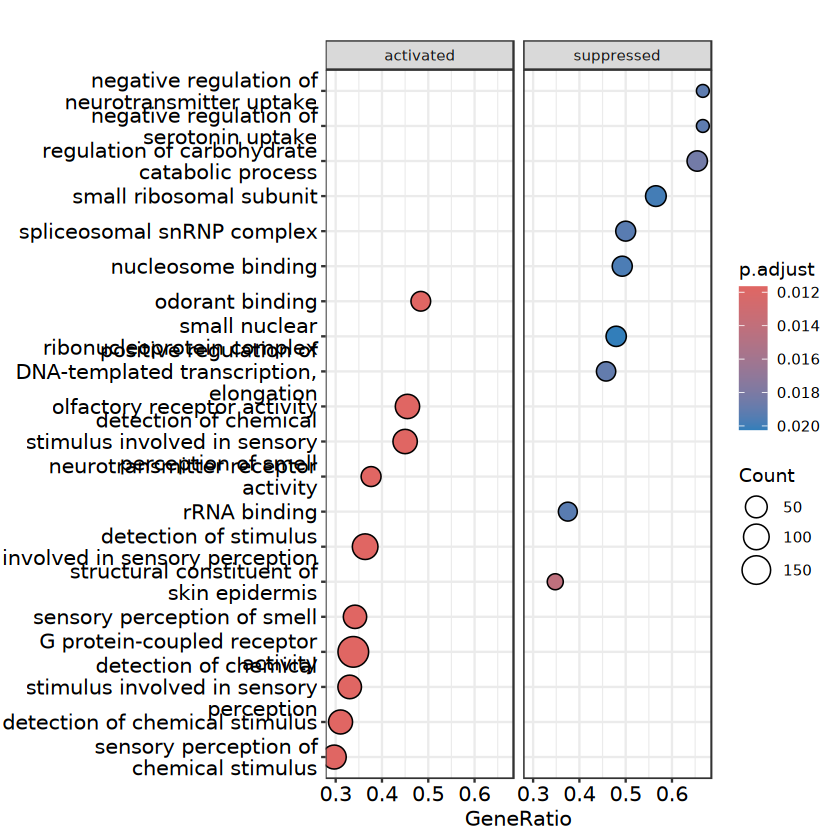

In [37]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


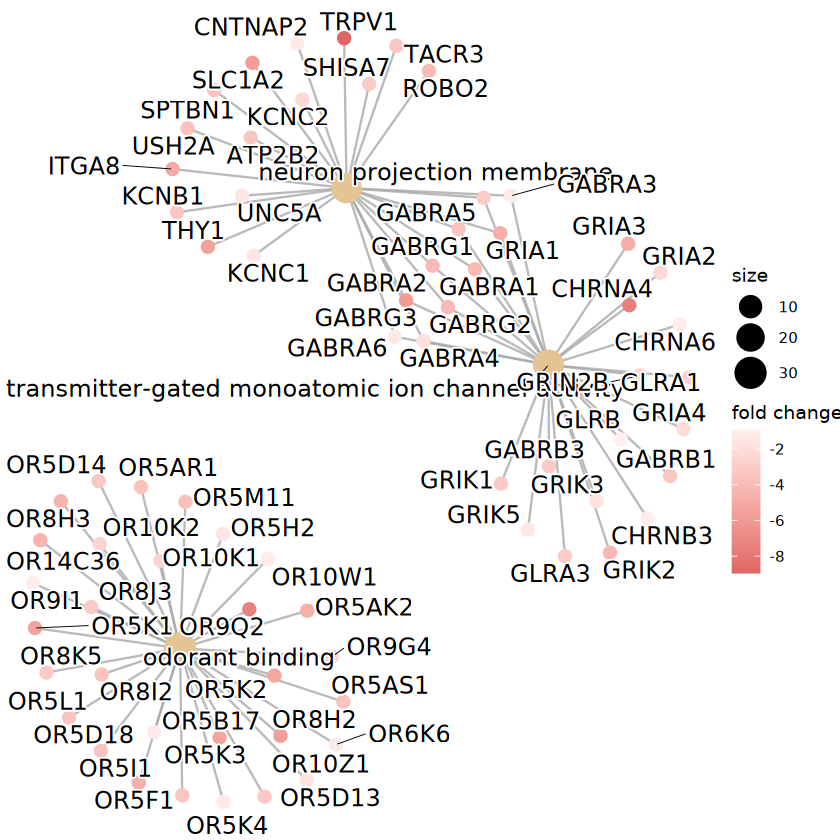

In [32]:
cnetplot(gse, categorySize="pvalue", foldChange=gene_list, showCategory = 3)

Picking joint bandwidth of 0.685



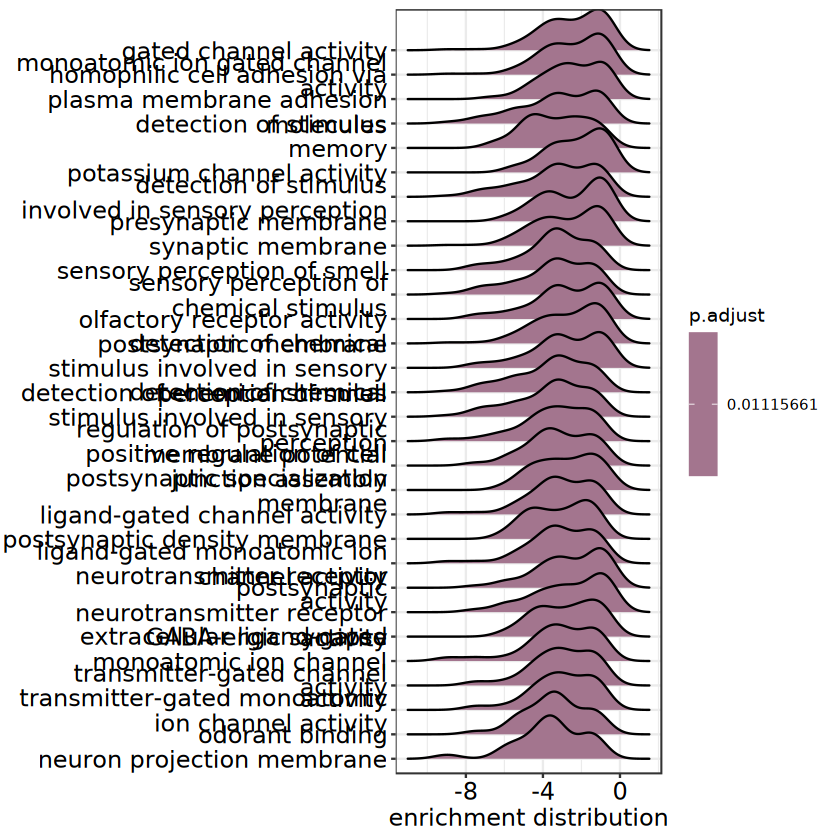

In [33]:
ridgeplot(gse) + labs(x = "enrichment distribution")

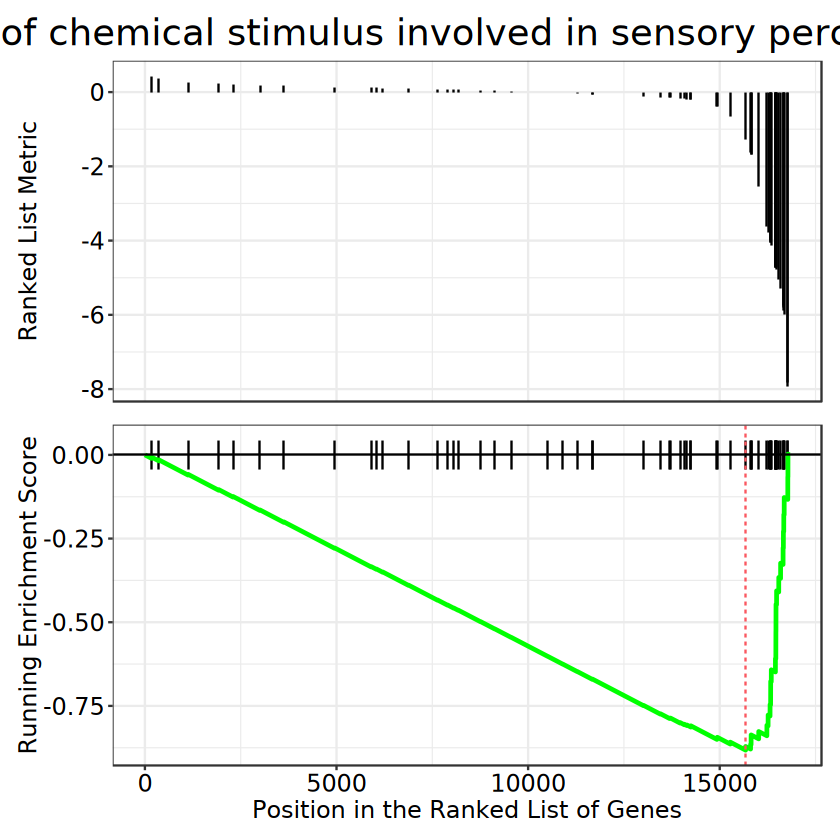

In [23]:
gseaplot(gse, by = "all", title = gse$Description[2], geneSetID = 1)

### 4.2 1

In [37]:
df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/1.csv', sep=",", header=TRUE)
# we want the log2 fold change 
original_gene_list <- df$Log2FC

# name the vector
names(original_gene_list) <- df$X

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "none")

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
leading edge analysis...

done...



In [35]:
gse

#
# Gene Set Enrichment Analysis
#
#...@organism 	 Homo sapiens 
#...@setType 	 GOALL 
#...@keytype 	 SYMBOL 
#...@geneList 	 Named num [1:10] 0.823 0.725 0.681 0.663 0.663 ...
 - attr(*, "names")= chr [1:10] "VCY1B" "RBMY1B" "RPS4Y2" "TRIM73" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'none' with cutoff <0.05 
#...2 enriched terms found
'data.frame':	2 obs. of  12 variables:
 $ ONTOLOGY       : chr  "BP" "BP"
 $ ID             : chr  "GO:0006807" "GO:0043170"
 $ Description    : chr  "nitrogen compound metabolic process" "macromolecule metabolic process"
 $ setSize        : int  3 3
 $ enrichmentScore: num  0.857 0.857
 $ NES            : num  1.7 1.7
 $ pvalue         : num  0.0142 0.0142
 $ p.adjust       : num  0.0142 0.0142
 $ qvalue         : num  0.232 0.232
 $ rank           : int  4 4
 $ leading_edge   : chr  "tags=100%, list=40%, signal=86%" "tags=100%, list=40%, signal=86%"
 $ core_enrichment: chr  "RBMY1B/RPS4Y2/TRIM73" "RBMY1B/RPS4Y2/TRIM73"
#...Citation
 T Wu, E Hu, S

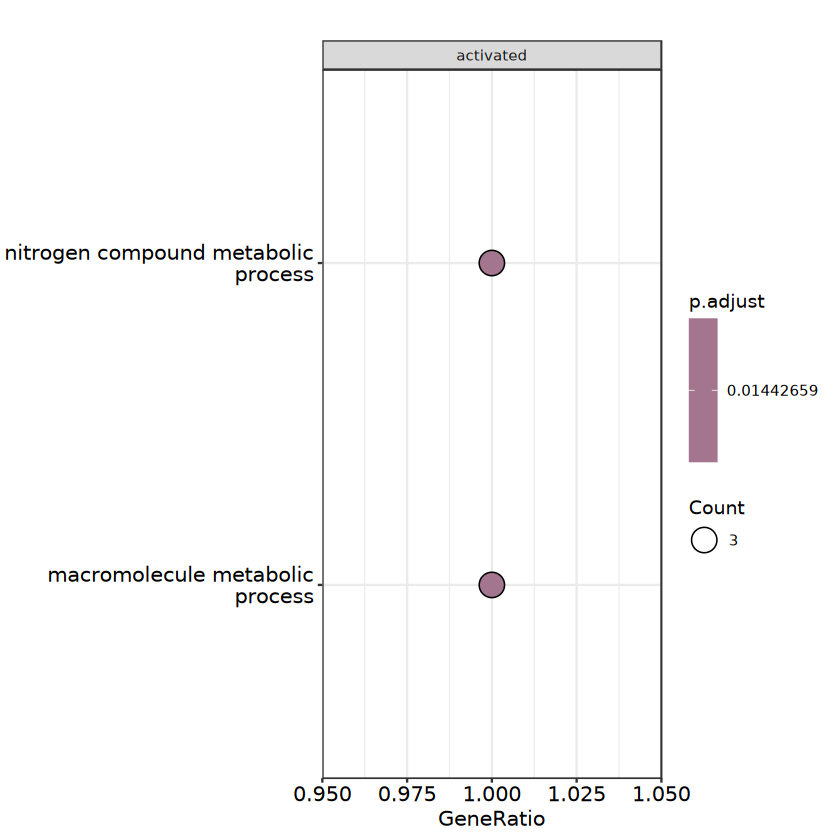

In [38]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

### 4.3 2

In [41]:
df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/2.csv', sep=",", header=TRUE)
# we want the log2 fold change 
original_gene_list <- df$Log2FC

# name the vector
names(original_gene_list) <- df$X

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "none")

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.06% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
leading edge analysis...

done...



In [20]:
gse

#
# Gene Set Enrichment Analysis
#
#...@organism 	 Homo sapiens 
#...@setType 	 GOALL 
#...@keytype 	 GENENAME 
#...@geneList 	 Named num [1:1792] 7.76 7.76 6.6 5.7 5.38 ...
 - attr(*, "names")= chr [1:1792] "TRIM48" "OR4A16" "CXorf51B" "KHDC3L" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'none' with cutoff <0.05 
#...0 enriched terms found
'data.frame':	0 obs. of  9 variables:
 $ ONTOLOGY       : chr 
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalue         : num 
#...Citation
 T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu.
 clusterProfiler 4.0: A universal enrichment tool for interpreting omics data.
 The Innovation. 2021, 2(3):100141 


In [46]:
dotplot_plot<-dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)
ggsave("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/dotplot2.png", plot = dotplot_plot, width =8, height = 16, dpi = 300)

### 4.4 3

In [47]:
df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/3.csv', sep=",", header=TRUE)
# we want the log2 fold change 
original_gene_list <- df$Log2FC

# name the vector
names(original_gene_list) <- df$X

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "none")

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
leading edge analysis...

done...



In [49]:
dotplot_plot<-dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)
ggsave("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/dotplot3.png", plot = dotplot_plot, width =8, height = 16, dpi = 300)

### 4.5 4

In [50]:
df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/4.csv', sep=",", header=TRUE)
# we want the log2 fold change 
original_gene_list <- df$Log2FC

# name the vector
names(original_gene_list) <- df$X

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "none")
dotplot_plot<-dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)
ggsave("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/dotplot4.png", plot = dotplot_plot, width =8, height = 16, dpi = 300)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
leading edge analysis...

done...



In [ ]:

for (i in 0:8) {
  # Read the data
  file_path <- sprintf('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/%d.csv', i)
  df <- read.table(file_path, sep = ",", header = TRUE)
  
  # Extract the log2 fold change values
  original_gene_list <- df$Log2FC
  
  # Name the vector
  names(original_gene_list) <- df$X
  
  # Omit any NA values 
  gene_list <- na.omit(original_gene_list)
  
  # Sort the list in decreasing order (required for clusterProfiler)
  gene_list <- sort(gene_list, decreasing = TRUE)
  
  # Perform GSEA
  gse <- gseGO(geneList = gene_list, 
               ont = "ALL", 
               keyType = "SYMBOL", 
               nPerm = 10000, 
               minGSSize = 3, 
               maxGSSize = 800, 
               pvalueCutoff = 0.05, 
               verbose = TRUE, 
               OrgDb = organism, 
               pAdjustMethod = "none")
  
  # Create the dotplot
  dotplot_plot <- dotplot(gse, showCategory = 10, split = ".sign") + facet_grid(. ~ .sign) +
    theme(
      text = element_text(size = 14),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
      axis.text.y = element_text(size = 12),
      strip.text = element_text(size = 14),
      plot.margin = unit(c(1, 1, 1, 1), "cm"),
      legend.text = element_text(size = 12),
      legend.title = element_text(size = 14)
    ) +
    scale_size(range = c(3, 10))
  
  # Save the plot to a file with larger dimensions
  output_path <- sprintf("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/060gene_sets/DAG_cell_type/dotplot%d.png", i)
  ggsave(output_path, plot = dotplot_plot, width = 8, height = 16, dpi = 300)
}
